In [1]:
from gensim.models.doc2vec import Doc2Vec, TaggedLineDocument
from nltk.tokenize import word_tokenize
import pandas as pd
import spacy 
nlp = spacy.load("de_core_news_sm")
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gzip,os,glob
import numpy as np
import pickle

import nltk
from nltk.corpus import wordnet as wn
from langdetect import detect
from sklearn.manifold import TSNE

<h1> Running the Doc2Vec Model </h1>
https://jlorince.github.io/viz-tutorial/

In [3]:
# Generate a list of tagged line documents, one per line from the file generated above
documents = [doc for doc in TaggedLineDocument('../data/df_content.txt')]

In [4]:
# Now just run the model. A simple little one-liner. Be sure to take advantages of the the `workers` option, which parallelizes the model automagically
model = Doc2Vec(documents, vector_size=200, window=5, min_count=5,workers=24)

In [6]:
# the resulting feature vectors are stored in `model.docvecs.doctag_syn0`, 
# so let's just save that numpy array
np.save('../data/features-w2v-200.npy',model.docvecs.doctag_syn0)

# vector normalization for tsne

from sklearn.preprocessing import Normalizer
nrm = Normalizer('l2')
normed = nrm.fit_transform(model.docvecs.doctag_syn0)
np.save('../data/features_normed-w2v-200.npy',normed)


C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if __name__ == '__main__':


In [7]:
np.load('../data/features_normed-w2v-200.npy')

array([[-0.00452981, -0.06109598,  0.01547244, ...,  0.09603886,
        -0.00739683,  0.03228616],
       [-0.00233133, -0.05360268,  0.0111948 , ...,  0.02858977,
         0.00333744,  0.17117079],
       [ 0.01191591, -0.01659335,  0.04105479, ...,  0.03252965,
        -0.04247134,  0.09497723],
       ...,
       [ 0.00396396,  0.05262039, -0.00490242, ...,  0.09252171,
        -0.07372936, -0.05172727],
       [-0.01487476, -0.09237758, -0.07258379, ...,  0.06950147,
         0.020952  ,  0.13196947],
       [ 0.08101277, -0.01681164, -0.03894716, ...,  0.06095194,
        -0.09020651,  0.12143229]], dtype=float32)

In [8]:
test_npy = np.load('../data/features_normed-w2v-200.npy')
test_npy.shape

(18141, 200)

In [49]:
# attempt to compute cosine similarity

# choose example 
example = 8
abstract_1 = documents[example]
# get example vector
vec_1 = normed[example,:]

# some DEBUG print statements
#print('vec_1',vec_1.shape)
#print('matirx',normed[example+1:,:].shape)

# compute similarity
sim = np.dot(normed[example+1:,:],vec_1)

# DEBUG
#print('sim',sim.shape)
#print('argmax',np.argmax(sim))

# find most similar document, see paper
abstract_2 = documents[np.argmax(sim)+example+1]

print('\nSimilarity:')
print(np.max(sim))
print('\nAbstract 1:')
print(' '.join(abstract_1[0]))
print('\nAbstract 2:')
print(' '.join(abstract_2[0]))


Similarity:
0.93556416

Abstract 1:
das komplexe und technisch hoch spezialisierte gebiet der geotechnik bildet ein fundament des bauingenieurwesens dessen herausforderungen heute u a im innerstädtischen infrastrukturbau im bauen im bestand oder in der gestaltung tiefer in das grundwasser hineinreichender baugruben liegen das vorliegende buch befähigt bauingenieure grundbauspezifische probleme zu erkennen und zu lösen prägnant und übersichtlich führt es insbesondere in alle wichtigen methoden der gründung und der geländesprungsicherung ein auch themen wie frost im baugrund baugrundverbesserung und wasserhaltung werden behandelt dem leser werden bewährte lösungen für viele fälle sowie eine große zahl von hinweisen auf weiterführende literatur an die hand gegeben alle darstellungen basieren auf dem aktuellen technischen regelwerk die darstellung der berechnung und bemessung anhand zahlreicher beispiele ist eine unverzichtbare orientierungshilfe in der täglichen planungs und gutachterpra

In [46]:
for word in model.wv.vocab:
    print(word)
    print(model[word].shape)
    break

content
(200,)


<h1>Step 2: Generate our 2D embedding</h1>
https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [51]:
# Creates TSNE model and plots it
x = []
y = []

def tsne_plot(model):
    labels = []
    tokens = []

    
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca',
                      n_iter=2500, 
                      random_state=23)
    # compute TSNE for word vectors of vocabulary
    #for word in model.wv.vocab:
    #    tokens.append(model[word])
    #    labels.append(word)
    #new_values = tsne_model.fit_transform(tokens)

    new_values = tsne_model.fit_transform(normed)
    
    global x,y
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    #plt.figure(figsize=(16, 16)) 
    #for i in range(len(x)):
    #    plt.scatter(x[i],y[i])
        #plt.annotate(labels[i],
         #            xy=(x[i], y[i]),
          #           xytext=(5, 2),
           #          xytext=(5, 2),
            #         textcoords='offset points',
             #        ha='right',
              #       va='bottom')
    #plt.show()


In [50]:
model.most_similar('auto')

C:\Users\Johannes\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('dorf', 0.9360750913619995),
 ('geschäft', 0.9220807552337646),
 ('zerbrechen', 0.9197377562522888),
 ('gesicht', 0.919475793838501),
 ('selbstbewusstsein', 0.9160377383232117),
 ('herz', 0.9127157926559448),
 ('küche', 0.9125606417655945),
 ('unglück', 0.9111500978469849),
 ('verschwindet', 0.910350501537323),
 ('wahnsinn', 0.909866452217102)]

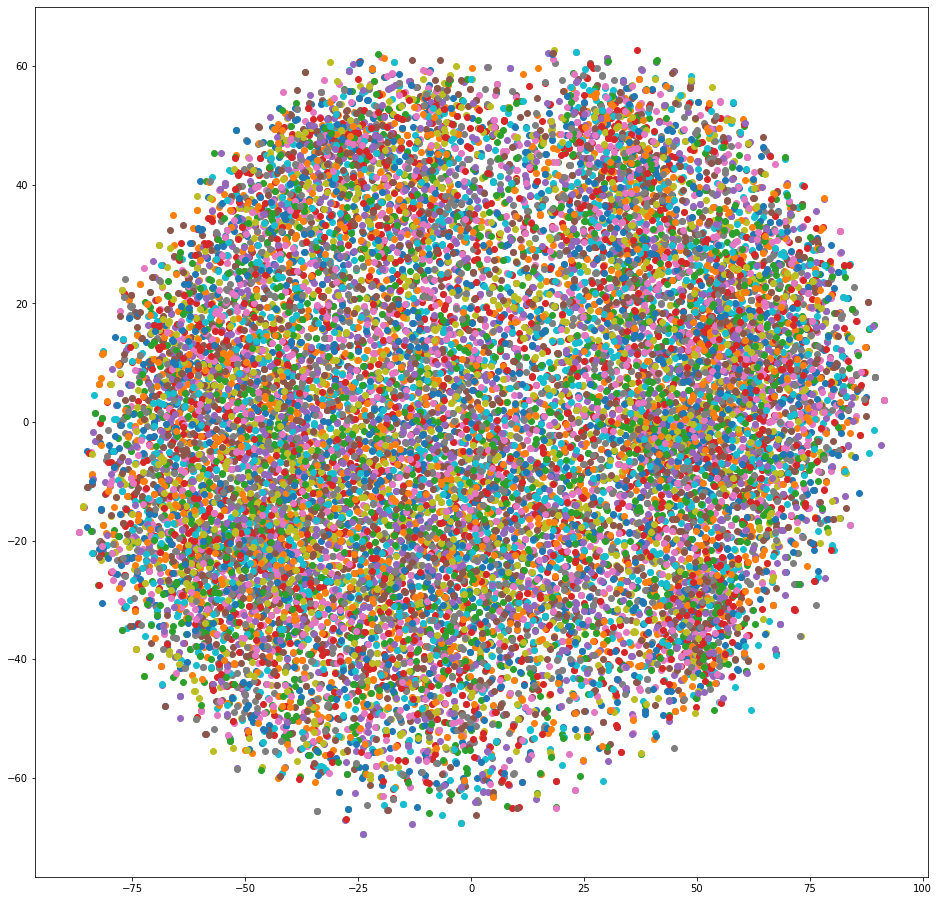

In [52]:
tsne_plot(model)

In [53]:
df_values = pd.DataFrame.from_dict({'x':x,'y':y})

In [54]:
print(df_values)

               x          y
0      13.032907 -40.049065
1     -59.196091 -26.018118
2     -68.278854 -12.706246
3     -72.513840   8.803761
4     -44.125237  28.995481
...          ...        ...
18136  74.678894  21.802183
18137 -48.920307 -25.932106
18138  66.799530  23.532034
18139  13.796491 -33.445446
18140 -55.683220 -10.325297

[18141 rows x 2 columns]


In [82]:
from ast import literal_eval
def read_list(x):
    if type(x) == str:
        return literal_eval(x)
    else:
        return x

df_content = pd.read_csv('../data/dataset_v0.1.csv')
df_content['class'] = df_content['class'].apply(read_list)
df_content.head()

,author,title,class,content,word_count,Languagereveiw
0,NaN,Aernout Mik - Communitas,[Kunstgeschichte],aernout mik zählt zu den wichtigsten künstlern...,64,de
1,NaN,Anton Henning : Dt. /Engl.,NaN,die vorliegende publikation widmet sich drei o...,113,de
2,"Specht, Heike","Die Feuchtwangers : Familie, Tradition und j...","[Sprachwissenschaften, Geschichte]",150 jahre geschichte deutschjüdischen bürgertu...,169,de
3,"Scruton, Roger",Grüne Philosophie : Ein konservativer Denkan...,"[Allgemeines, Philosophie, Theologie und Relig...",der umweltschutz liegt herkömmlich im hoheitsg...,101,de
4,"Schlagowski, Heinz",Technische Dokumentation im Maschinen- und An...,[Technik],das buch gibt dem anwender die entscheidenden ...,156,de


In [83]:
# merge data with computed 2 D Vectors

# drop line corresponding to vector of line containing only "content"
df_values_new = df_values.iloc[1:,:]
df_values_new.reset_index(inplace=True)

# merge data
df = pd.concat([df_content,df_values_new],axis=1)
df.drop(inplace=True, columns=['Languagereveiw','index'])

# save data
df.to_csv('../data/dataset_v1.0.csv')


df.head()

,author,title,class,content,word_count,x,y
0,NaN,Aernout Mik - Communitas,[Kunstgeschichte],aernout mik zählt zu den wichtigsten künstlern...,64,-59.196091,-26.018118
1,NaN,Anton Henning : Dt. /Engl.,NaN,die vorliegende publikation widmet sich drei o...,113,-68.278854,-12.706246
2,"Specht, Heike","Die Feuchtwangers : Familie, Tradition und j...","[Sprachwissenschaften, Geschichte]",150 jahre geschichte deutschjüdischen bürgertu...,169,-72.513840,8.803761
3,"Scruton, Roger",Grüne Philosophie : Ein konservativer Denkan...,"[Allgemeines, Philosophie, Theologie und Relig...",der umweltschutz liegt herkömmlich im hoheitsg...,101,-44.125237,28.995481
4,"Schlagowski, Heinz",Technische Dokumentation im Maschinen- und An...,[Technik],das buch gibt dem anwender die entscheidenden ...,156,66.997078,3.314084


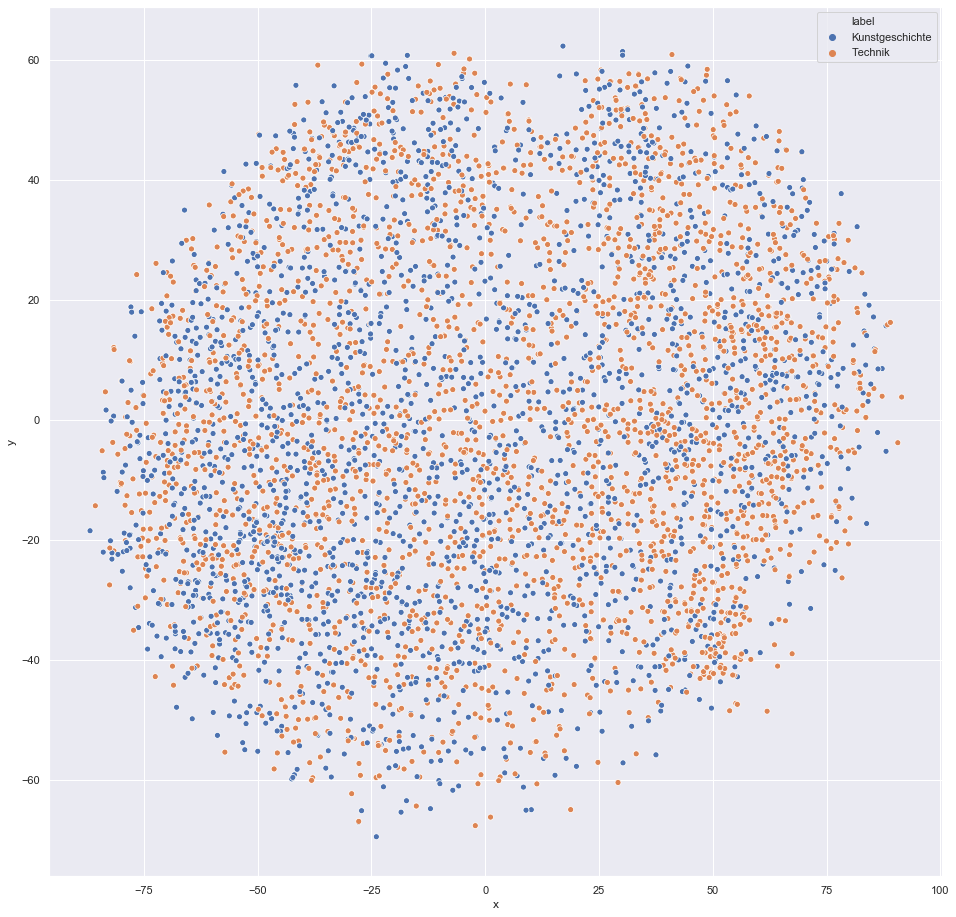

In [93]:
import seaborn as sns
sns.set()

def compare_lists(list_1):
    ''' 
    return 1 if list_1 contains an element mentioned in CATEGORIES
    '''
    global CATEGORIES
    if type(list_1) != list:
        return 0
    for element in list_1:
        if element in CATEGORIES:
            return 1
    return 0

def label(list_1):
    '''
    checks if CATEGORY contains an element contained in list_1
    returns that elment
    no double categories possible
    needs to be improveed
    '''
    global CATEGORIES
    if type(list_1) != list:
        return ''
    for cat in CATEGORIES:
        if cat in list_1:
            return cat
    return ''

def visualize_categories():
    ''' plots data with categores defined in CATEGORIES '''
    df['to_visualize'] = df['class'].apply(compare_lists)
    df['label'] = df['class'].apply(label)
    plt.figure(figsize=(16, 16))
    sns.scatterplot(x='x',y='y',hue='label',data=df.loc[df['to_visualize']==1])

    
CATEGORIES = ['Kunstgeschichte','Technik']
visualize_categories()
#df.head()

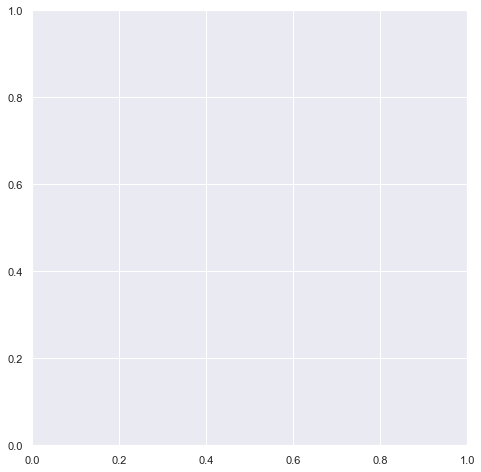

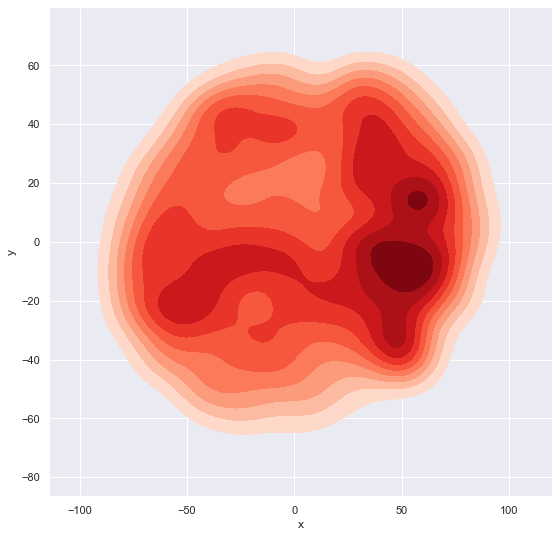

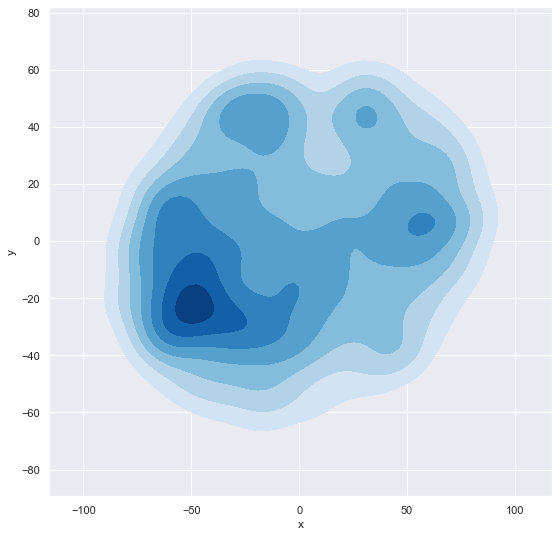

In [94]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

plt.figure(figsize=(9, 9))
sns.kdeplot(df.loc[df['label']=='Technik'].x,df.loc[df['label']=='Technik'].y,
                 cmap="Reds", shade=True, shade_lowest=False)
plt.show()
plt.figure(figsize=(9, 9))
sns.kdeplot(df.loc[df['label']=='Kunstgeschichte'].x,df.loc[df['label']=='Kunstgeschichte'].y,
                 cmap="Blues", shade=True, shade_lowest=False)
plt.show()

#red = sns.color_palette("Reds")[-2]
#blue = sns.color_palette("Blues")[-2]
#ax.text(2.5, 8.2, "virginica", size=16, color=blue)
#ax.text(3.8, 4.5, "setosa", size=16, color=red)